# 02_eda_and_visualization.ipynb

## Exploratory Data Analysis & Visualization  
### North Korea Missile Launch Events (2023–2024)

This notebook performs exploratory data analysis (EDA) and visualization
based on the fully processed dataset generated in
`01_preprocess_csis_and_events.ipynb`.

Key objectives:
- Understand temporal trends in missile launches
- Compare launch activity by missile type and technology (e.g., HGV)
- Prepare publication-quality figures for GitHub and PDF reporting


In [1]:
# Step 0. Setup & load processed data

import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Optional: for nicer default figures
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Paths
PROJECT_ROOT = Path("..").resolve()
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

DATA_PATH = PROCESSED_DIR / "launch_events_2023_2024_processed.csv"

# Load data
df = pd.read_csv(DATA_PATH)

# Parse dates
df["launch_date"] = pd.to_datetime(df["launch_date"], errors="coerce")

print("Loaded dataset shape:", df.shape)
display(df.head())


Loaded dataset shape: (48, 23)
Loaded dataset shape: (48, 23)


,event_id,launch_date,year,month,year_month,missile_name,missile_name_rom,missile_name_csis,type_group,type_group_base,...,count_launched,count_flag,count_launched_raw,launch_site,target,source_org,source_title,source_url,matched_csis,event_text
0,20230101_SRBM_KN-25,2023-01-01,2023,1,2023-01,KN-25,KN-25,KN-25,SRBM,SRBM,...,NaN,NaN,NaN,평양시 룡성구역,동해,합참,SRBM 1발 발사,siste:donga.com,True,"합참 “北, 평양 용성 일대서 SRBM 1발 발사”…이틀 연속 도발 감행"
1,20230218_ICBM_화성-15,2023-02-18,2023,2,2023-02,화성-15,Hwasong-15,Hwasong-15,ICBM,ICBM,...,NaN,NaN,NaN,평양시 순안구역,동해,합참,ICBM추정 1발 동해상 발사,site:joongang.co.kr,True,"[속보] 軍 ""북, 평양순안서 장거리 추정 1발 동해상 발사"" [출처:중앙일보] h..."
2,20230220_SRBM_KN-25,2023-02-20,2023,2,2023-02,KN-25,KN-25,KN-25,SRBM,SRBM,...,NaN,NaN,NaN,평안남도 숙천군,동해,합참,SRBM 2발 발사,site:imnews.imbc.com,True,"북한 ""전술핵 수단 방사포 2발 동해상으로 사격‥한미 공군에 대응"""
3,20230223_CRUISE_화살-2,2023-02-23,2023,2,2023-02,화살-2,Hwasal-2,NaN,CRUISE,CRUISE,...,NaN,NaN,NaN,함경북도 김책시,동해,국군,CRUISE 4발 발사,site:naver.com,False,"北, “동해상에 순항미사일 쐈다”…우리 군, “레이더망에 포착 안 돼”"
4,20230309_SRBM_화성-11라,2023-03-09,2023,3,2023-03,화성-11라,Hwasong-11-D,NaN,SRBM,SRBM,...,NaN,multiple_unspecified,NaN,남포시 강서구역,황해,합참,"SRBM 1발사, 이후 수발로 정정",site:yna.co.kr,False,"北, 서해방향 단거리탄도미사일 발사…한미연합연습 앞두고 도발(종합)"


,event_id,launch_date,year,month,year_month,missile_name,missile_name_rom,missile_name_csis,type_group,type_group_base,...,count_launched,count_flag,count_launched_raw,launch_site,target,source_org,source_title,source_url,matched_csis,event_text
0,20230101_SRBM_KN-25,2023-01-01,2023,1,2023-01,KN-25,KN-25,KN-25,SRBM,SRBM,...,NaN,NaN,NaN,평양시 룡성구역,동해,합참,SRBM 1발 발사,siste:donga.com,True,"합참 “北, 평양 용성 일대서 SRBM 1발 발사”…이틀 연속 도발 감행"
1,20230218_ICBM_화성-15,2023-02-18,2023,2,2023-02,화성-15,Hwasong-15,Hwasong-15,ICBM,ICBM,...,NaN,NaN,NaN,평양시 순안구역,동해,합참,ICBM추정 1발 동해상 발사,site:joongang.co.kr,True,"[속보] 軍 ""북, 평양순안서 장거리 추정 1발 동해상 발사"" [출처:중앙일보] h..."
2,20230220_SRBM_KN-25,2023-02-20,2023,2,2023-02,KN-25,KN-25,KN-25,SRBM,SRBM,...,NaN,NaN,NaN,평안남도 숙천군,동해,합참,SRBM 2발 발사,site:imnews.imbc.com,True,"북한 ""전술핵 수단 방사포 2발 동해상으로 사격‥한미 공군에 대응"""
3,20230223_CRUISE_화살-2,2023-02-23,2023,2,2023-02,화살-2,Hwasal-2,NaN,CRUISE,CRUISE,...,NaN,NaN,NaN,함경북도 김책시,동해,국군,CRUISE 4발 발사,site:naver.com,False,"北, “동해상에 순항미사일 쐈다”…우리 군, “레이더망에 포착 안 돼”"
4,20230309_SRBM_화성-11라,2023-03-09,2023,3,2023-03,화성-11라,Hwasong-11-D,NaN,SRBM,SRBM,...,NaN,multiple_unspecified,NaN,남포시 강서구역,황해,합참,"SRBM 1발사, 이후 수발로 정정",site:yna.co.kr,False,"北, 서해방향 단거리탄도미사일 발사…한미연합연습 앞두고 도발(종합)"


In [2]:
# Global matplotlib font setup for Korean text
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Windows default Korean font
font_path = "C:/Windows/Fonts/malgun.ttf"

if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams["font.family"] = font_prop.get_name()
else:
    print("WARNING: Korean font not found. Hangul may not render correctly.")

# Prevent minus sign from breaking
plt.rcParams["axes.unicode_minus"] = False


## Step 1. Temporal Trends (Monthly / Weekly / Event Timeline)

This step visualizes overall launch activity over time:
- Monthly launch counts (main trend figure)
- Weekly launch counts (higher-resolution trend)
- Event timeline scatter (distribution over time)

All figures are saved to:
- `outputs/figures/`


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig1_monthly_launch_events.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig1_monthly_launch_events.png


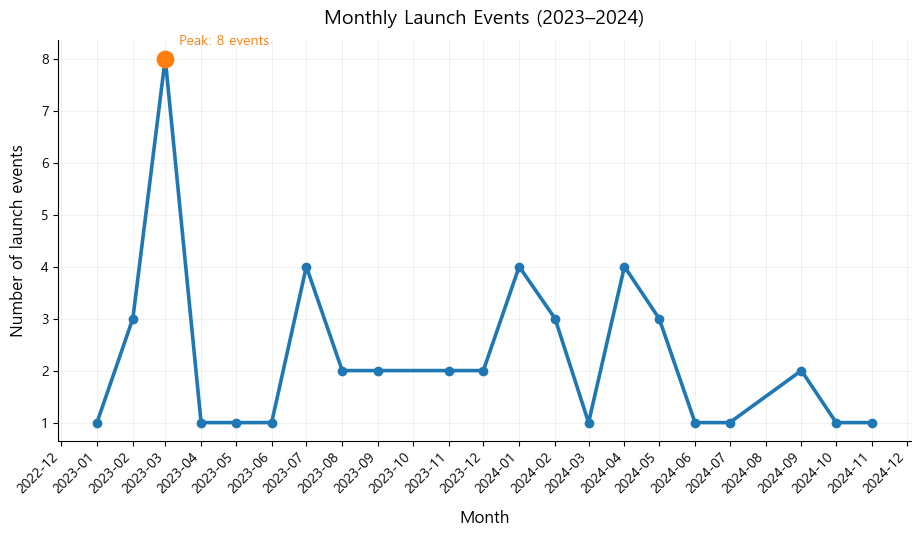

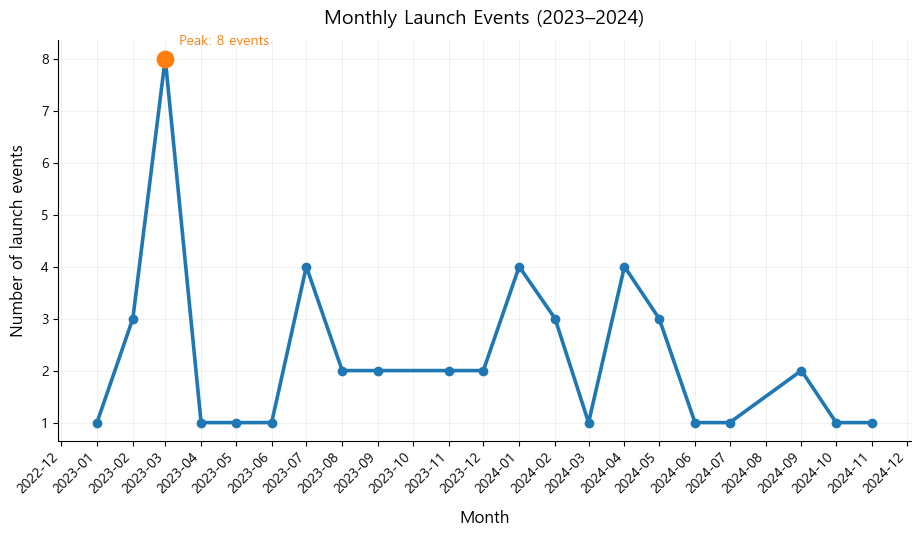

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig2_weekly_launch_events.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig2_weekly_launch_events.png


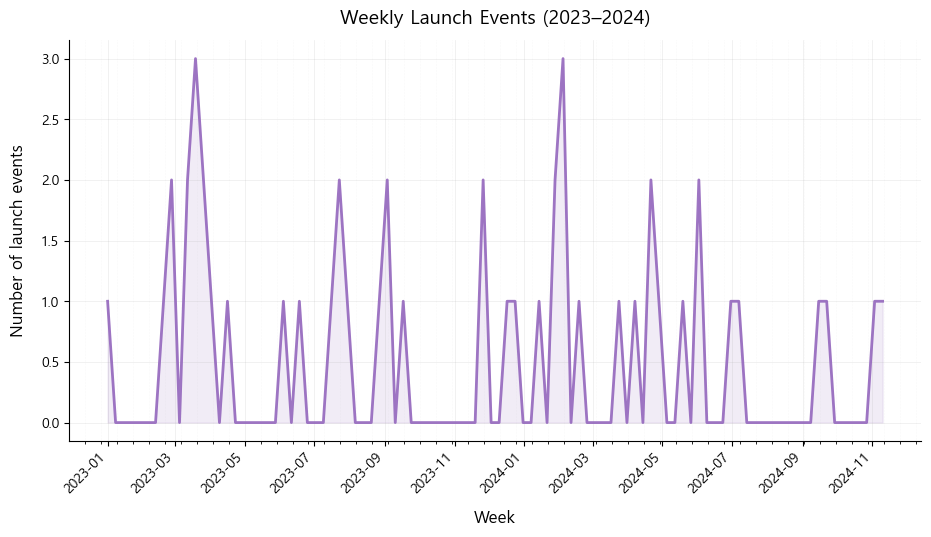

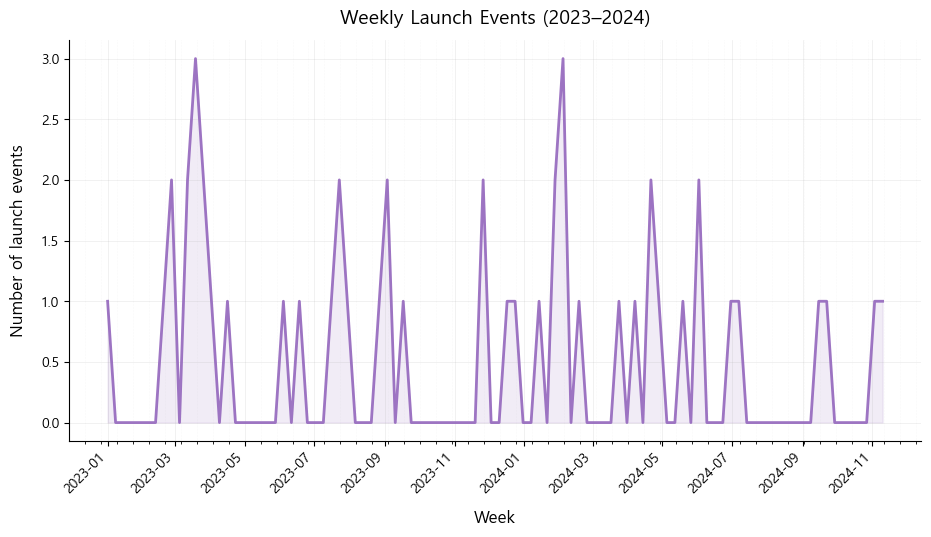

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig3_timeline_by_type_and_hgv.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig3_timeline_by_type_and_hgv.png


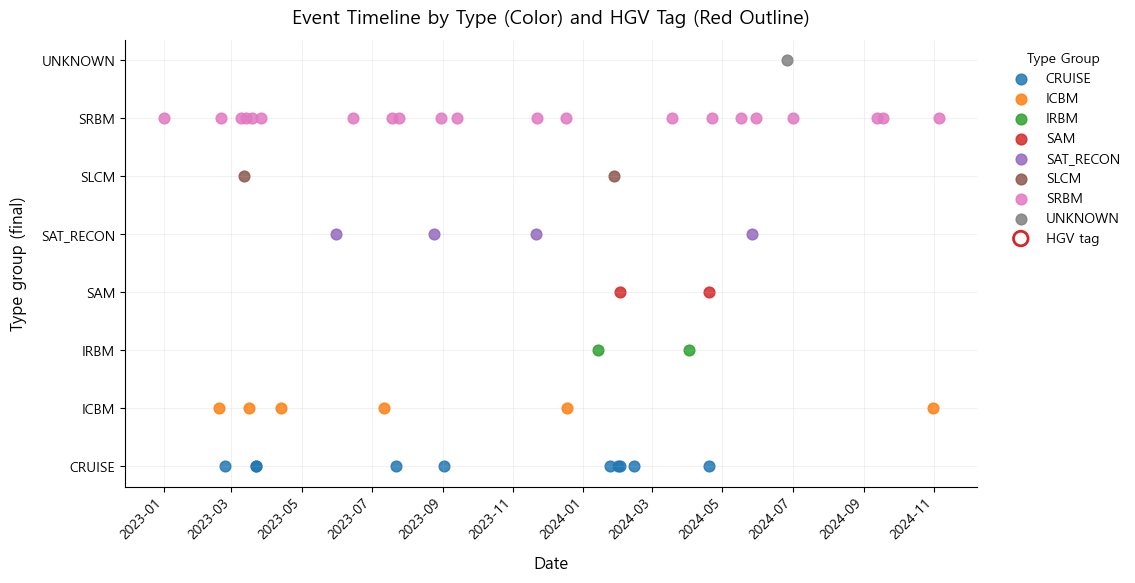

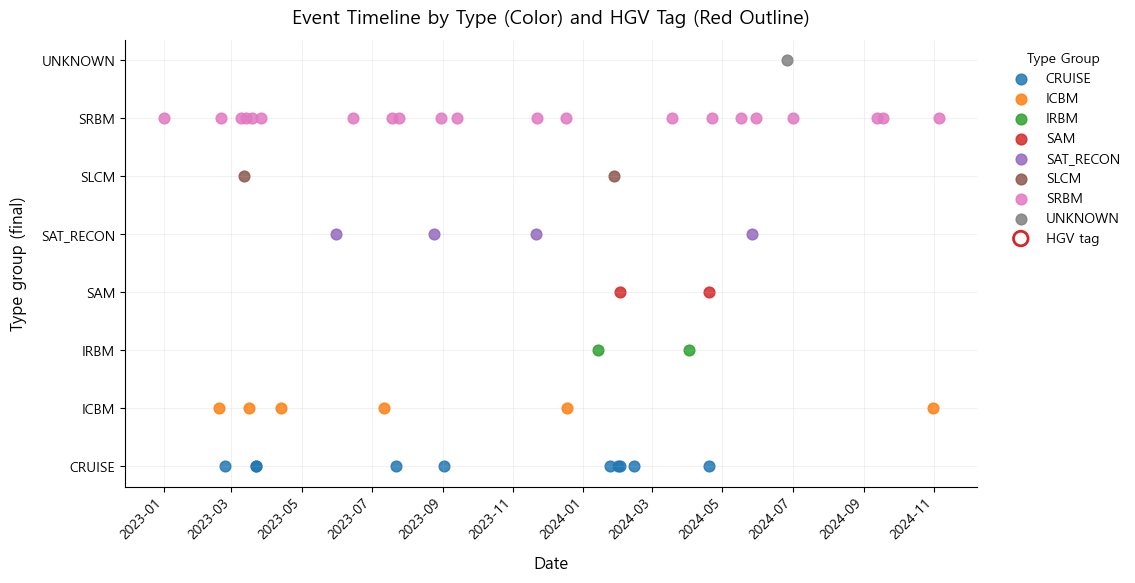

In [3]:
# Step 1. Temporal Trends (high-quality styling + multi-color palette)

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1-0) Output directory
FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# 1-1) Defensive checks
required_cols = ["launch_date", "year_month", "type_group_base_final", "has_hgv"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for Step 1: {missing}")

# Ensure datetime
df["launch_date"] = pd.to_datetime(df["launch_date"], errors="coerce")
df = df.dropna(subset=["launch_date"]).copy()

# 1-2) A clean, publication-friendly style (colors allowed: user requested)
PALETTE = {
    "primary": "#1f77b4",
    "accent":  "#ff7f0e",
    "accent2": "#2ca02c",
    "muted":   "#7f7f7f",
    "danger":  "#d62728",
    "purple":  "#9467bd",
    "brown":   "#8c564b",
}

def style_axes(ax, title=None, xlabel=None, ylabel=None):
    ax.grid(True, which="major", linestyle="-", linewidth=0.5, alpha=0.25)
    ax.grid(True, which="minor", linestyle=":", linewidth=0.4, alpha=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if title: ax.set_title(title, pad=12)
    if xlabel: ax.set_xlabel(xlabel, labelpad=10)
    if ylabel: ax.set_ylabel(ylabel, labelpad=10)

def save_fig(fig, filename):
    out = FIG_DIR / filename
    fig.savefig(out, dpi=200, bbox_inches="tight")
    print("Saved:", out)

# Helper: robust monthly period
df["year_month"] = pd.to_datetime(df["year_month"], errors="coerce").dt.to_period("M").astype(str)

# ==========================================
# Figure 1: Monthly launch counts (Main)
# ==========================================
monthly = (
    df.groupby("year_month", as_index=False)
      .size()
      .rename(columns={"size": "launch_events"})
)
monthly["year_month_dt"] = pd.to_datetime(monthly["year_month"] + "-01")

fig, ax = plt.subplots(figsize=(11, 5.2))

# Line + markers
ax.plot(
    monthly["year_month_dt"],
    monthly["launch_events"],
    linewidth=2.6,
    marker="o",
    markersize=6,
    color=PALETTE["primary"],
)

# Highlight max month
imax = monthly["launch_events"].idxmax()
ax.scatter(
    [monthly.loc[imax, "year_month_dt"]],
    [monthly.loc[imax, "launch_events"]],
    s=140,
    color=PALETTE["accent"],
    zorder=5
)
ax.annotate(
    f"Peak: {monthly.loc[imax, 'launch_events']} events",
    (monthly.loc[imax, "year_month_dt"], monthly.loc[imax, "launch_events"]),
    textcoords="offset points",
    xytext=(10, 10),
    fontsize=10,
    color=PALETTE["accent"]
)

# Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

style_axes(
    ax,
    title="Monthly Launch Events (2023–2024)",
    xlabel="Month",
    ylabel="Number of launch events"
)

save_fig(fig, "fig1_monthly_launch_events.png")
plt.show()

# ==========================================
# Figure 2: Weekly launch counts (higher-res)
# ==========================================
weekly = (
    df.set_index("launch_date")
      .resample("W")
      .size()
      .rename("launch_events")
      .reset_index()
)

fig, ax = plt.subplots(figsize=(11, 5.2))
ax.plot(
    weekly["launch_date"],
    weekly["launch_events"],
    linewidth=2.0,
    color=PALETTE["purple"],
    alpha=0.9
)

# Fill under curve for a more premium look
ax.fill_between(
    weekly["launch_date"],
    weekly["launch_events"],
    0,
    color=PALETTE["purple"],
    alpha=0.12
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

style_axes(
    ax,
    title="Weekly Launch Events (2023–2024)",
    xlabel="Week",
    ylabel="Number of launch events"
)

save_fig(fig, "fig2_weekly_launch_events.png")
plt.show()

# ==========================================
# Figure 3: Event timeline scatter (distribution)
# - Colors encode type_group_base_final
# - Marker edge highlights HGV
# ==========================================
# Prepare type palette (dynamic, stable ordering)
type_order = sorted(df["type_group_base_final"].dropna().unique().tolist())

# Multi-color palette for categories (distinct + readable)
type_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]
color_map = {t: type_colors[i % len(type_colors)] for i, t in enumerate(type_order)}

# Map each event to y-level by type for readability
type_to_y = {t: i for i, t in enumerate(type_order)}
df_plot = df.copy()
df_plot["y"] = df_plot["type_group_base_final"].map(type_to_y)

fig, ax = plt.subplots(figsize=(11, 5.8))

# Base scatter per type (multi-color)
for t in type_order:
    sub = df_plot[df_plot["type_group_base_final"] == t]
    ax.scatter(
        sub["launch_date"],
        sub["y"],
        s=60,
        color=color_map[t],
        alpha=0.85,
        label=t
    )

# Overlay HGV events (edge highlight)
hgv = df_plot[df_plot["has_hgv"] == True]
ax.scatter(
    hgv["launch_date"],
    hgv["y"],
    s=110,
    facecolors="none",
    edgecolors=PALETTE["danger"],
    linewidths=2.0,
    label="HGV tag"
)

ax.set_yticks(range(len(type_order)))
ax.set_yticklabels(type_order)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

style_axes(
    ax,
    title="Event Timeline by Type (Color) and HGV Tag (Red Outline)",
    xlabel="Date",
    ylabel="Type group (final)"
)

# Legend: place outside for a clean look
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    frameon=False,
    title="Type Group"
)

save_fig(fig, "fig3_timeline_by_type_and_hgv.png")
plt.show()


## Step 2. Missile Type Composition and Yearly Comparison

This step analyzes the composition of missile launch events by type group.

We focus on:
- Overall type distribution (counts)
- Relative composition by year (percentage-based comparison)

These figures highlight qualitative shifts in North Korea’s launch behavior
between 2023 and 2024.


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig4_type_distribution_counts.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig4_type_distribution_counts.png


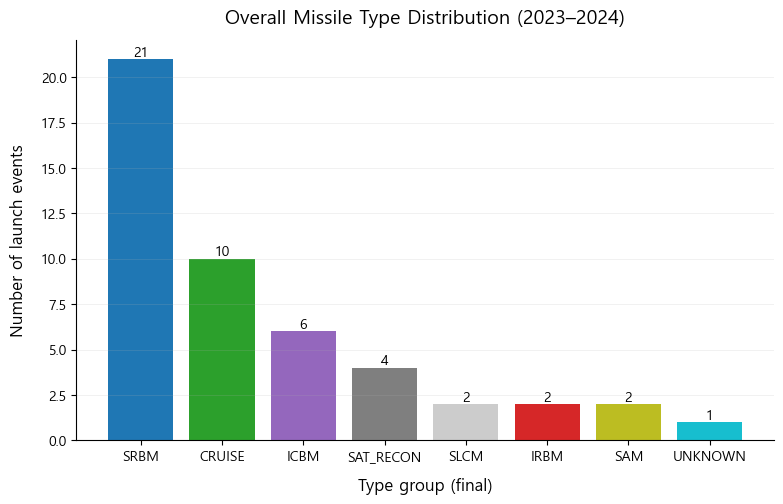

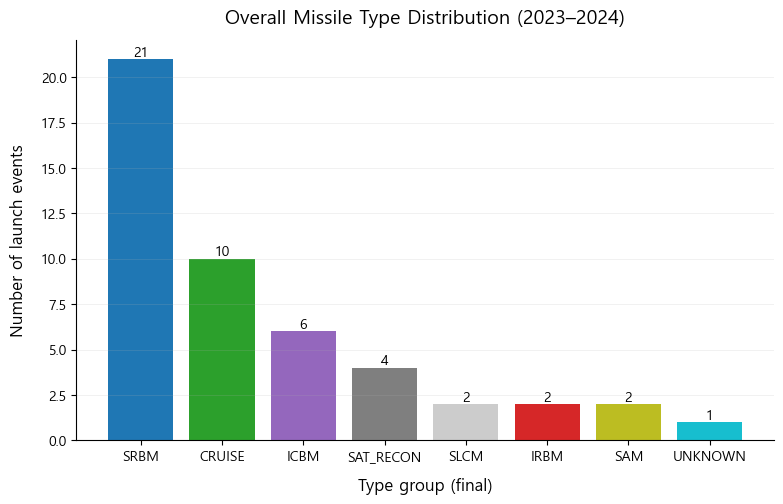

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig5_type_composition_stacked_counts.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig5_type_composition_stacked_counts.png


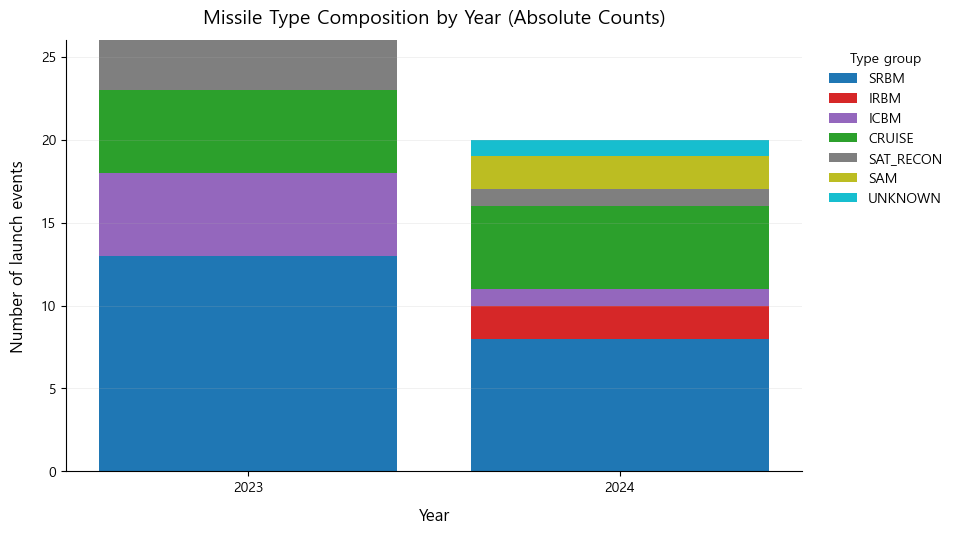

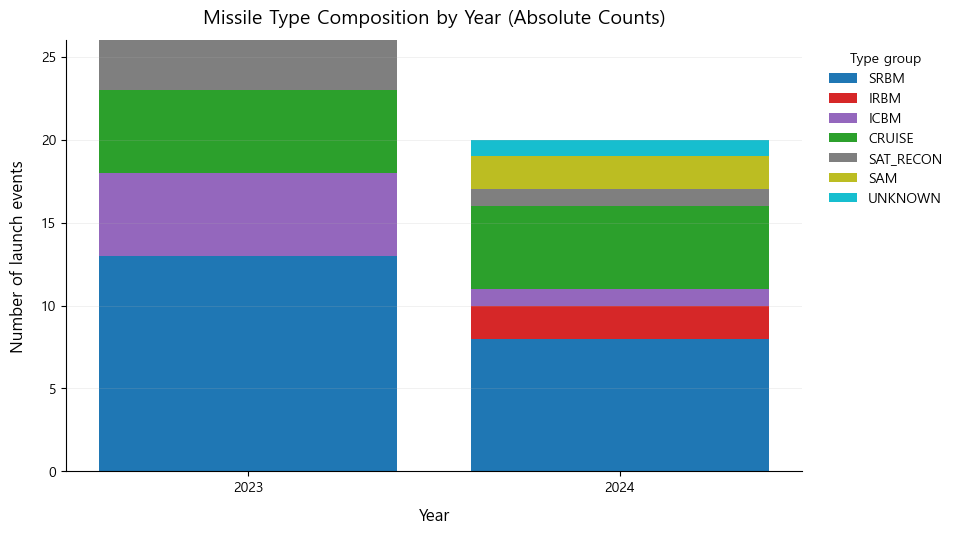

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig6_type_composition_stacked_percentage.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig6_type_composition_stacked_percentage.png


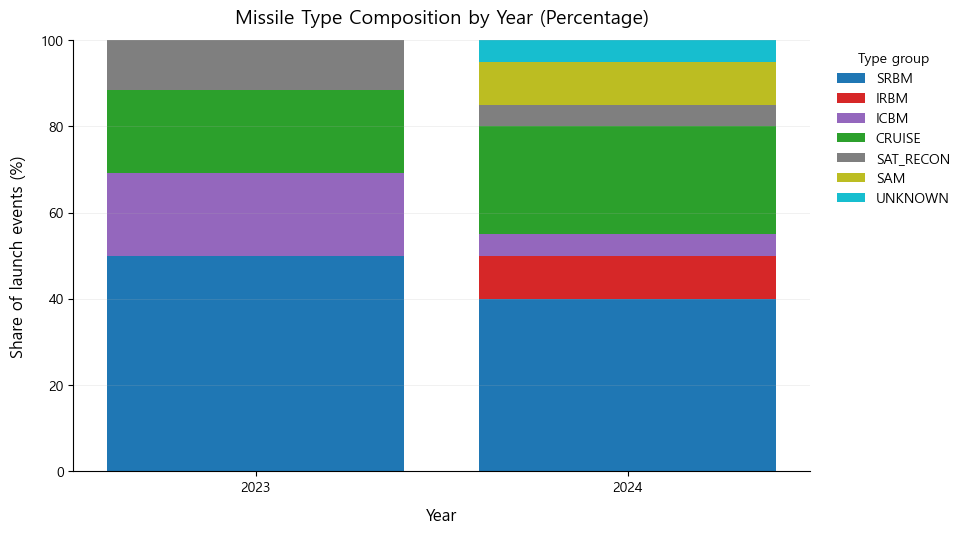

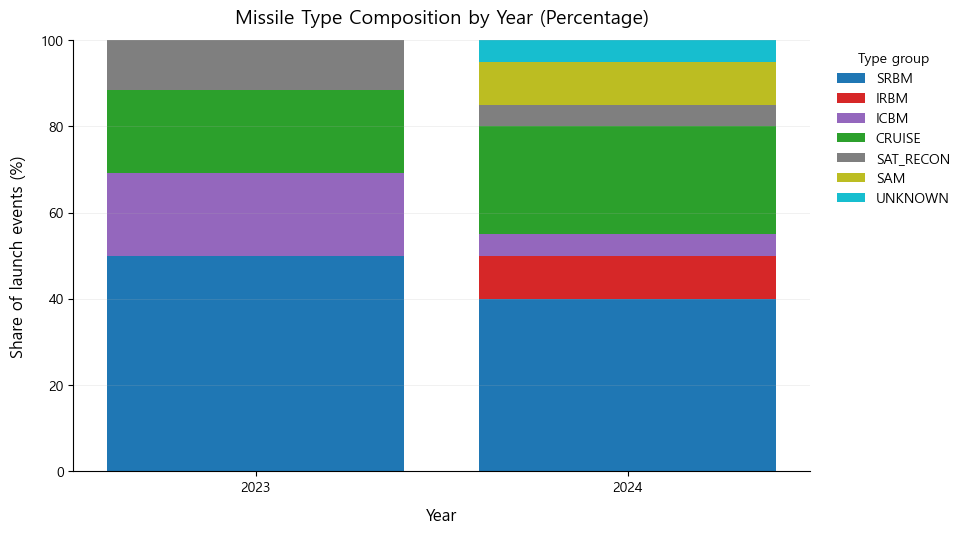

In [4]:
# Step 2. Type composition & yearly comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Output directory (reuse from Step 1)
FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Defensive checks
required_cols = ["year", "type_group_base_final"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for Step 2: {missing}")

# Clean year
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df2 = df.dropna(subset=["year", "type_group_base_final"]).copy()

# Color palette for type groups (consistent & readable)
TYPE_COLORS = {
    "SRBM": "#1f77b4",
    "MRBM": "#ff7f0e",
    "IRBM": "#d62728",
    "ICBM": "#9467bd",
    "CRUISE": "#2ca02c",
    "SLBM": "#8c564b",
    "SAT_RECON": "#7f7f7f",
    "SAM": "#bcbd22",
    "UNKNOWN": "#17becf",
}

# Helper for consistent styling
def style_axes(ax, title=None, xlabel=None, ylabel=None):
    ax.grid(True, axis="y", linestyle="-", linewidth=0.5, alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if title: ax.set_title(title, pad=12)
    if xlabel: ax.set_xlabel(xlabel, labelpad=10)
    if ylabel: ax.set_ylabel(ylabel, labelpad=10)

def save_fig(fig, filename):
    out = FIG_DIR / filename
    fig.savefig(out, dpi=200, bbox_inches="tight")
    print("Saved:", out)

# ======================================================
# Figure 4. Overall type distribution (counts)
# ======================================================
type_counts = (
    df2["type_group_base_final"]
    .value_counts()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(9, 5.2))

bars = ax.bar(
    type_counts.index,
    type_counts.values,
    color=[TYPE_COLORS.get(t, "#cccccc") for t in type_counts.index]
)

# Value labels
for b in bars:
    ax.text(
        b.get_x() + b.get_width() / 2,
        b.get_height(),
        int(b.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

style_axes(
    ax,
    title="Overall Missile Type Distribution (2023–2024)",
    xlabel="Type group (final)",
    ylabel="Number of launch events"
)

save_fig(fig, "fig4_type_distribution_counts.png")
plt.show()

# ======================================================
# Figure 5. Yearly stacked bar (absolute counts)
# ======================================================
year_type_counts = (
    df2.groupby(["year", "type_group_base_final"])
       .size()
       .unstack(fill_value=0)
)

# Ensure consistent column order
cols_order = [c for c in TYPE_COLORS.keys() if c in year_type_counts.columns]
year_type_counts = year_type_counts[cols_order]

fig, ax = plt.subplots(figsize=(9.5, 5.6))

bottom = np.zeros(len(year_type_counts))
x = np.arange(len(year_type_counts.index))

for t in cols_order:
    ax.bar(
        x,
        year_type_counts[t],
        bottom=bottom,
        label=t,
        color=TYPE_COLORS.get(t, "#cccccc")
    )
    bottom += year_type_counts[t].values

ax.set_xticks(x)
ax.set_xticklabels(year_type_counts.index.astype(int))

style_axes(
    ax,
    title="Missile Type Composition by Year (Absolute Counts)",
    xlabel="Year",
    ylabel="Number of launch events"
)

ax.legend(
    title="Type group",
    bbox_to_anchor=(1.02, 1.0),
    loc="upper left",
    frameon=False
)

save_fig(fig, "fig5_type_composition_stacked_counts.png")
plt.show()

# ======================================================
# Figure 6. Yearly 100% stacked bar (percentage)
# ======================================================
year_type_pct = year_type_counts.div(year_type_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(9.5, 5.6))

bottom = np.zeros(len(year_type_pct))
for t in cols_order:
    ax.bar(
        x,
        year_type_pct[t],
        bottom=bottom,
        label=t,
        color=TYPE_COLORS.get(t, "#cccccc")
    )
    bottom += year_type_pct[t].values

ax.set_xticks(x)
ax.set_xticklabels(year_type_pct.index.astype(int))

style_axes(
    ax,
    title="Missile Type Composition by Year (Percentage)",
    xlabel="Year",
    ylabel="Share of launch events (%)"
)

ax.set_ylim(0, 100)

ax.legend(
    title="Type group",
    bbox_to_anchor=(1.02, 1.0),
    loc="upper left",
    frameon=False
)

save_fig(fig, "fig6_type_composition_stacked_percentage.png")
plt.show()


## Step 3. CSIS Matching & Classification Reliability

This step evaluates how well the author-compiled launch event dataset
aligns with the CSIS missile profile reference.

The goal is NOT to maximize matching rates,
but to quantify:
- Which events fall within established CSIS missile categories
- Which events reflect systems or activities outside CSIS scope
  (e.g., reconnaissance satellites, SAMs, experimental systems)

This analysis supports transparency and methodological rigor.


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig7_csis_matching_overall.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig7_csis_matching_overall.png


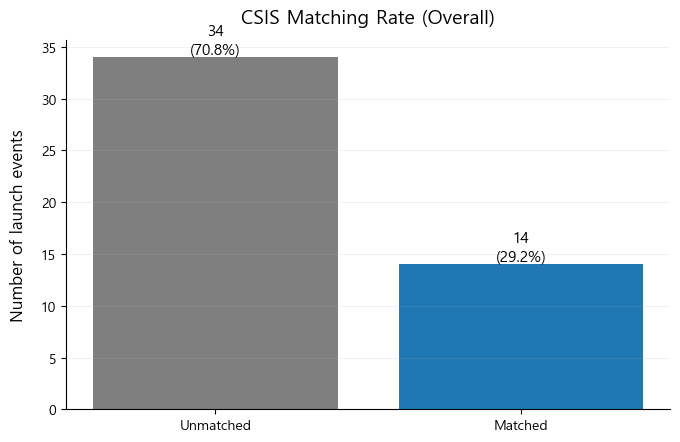

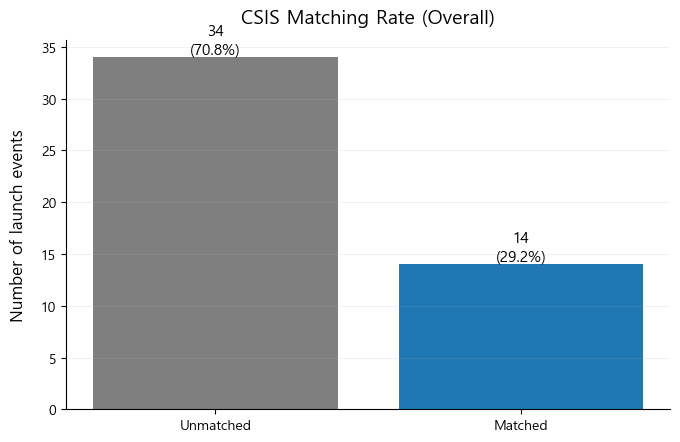

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig8_csis_matching_by_type.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig8_csis_matching_by_type.png


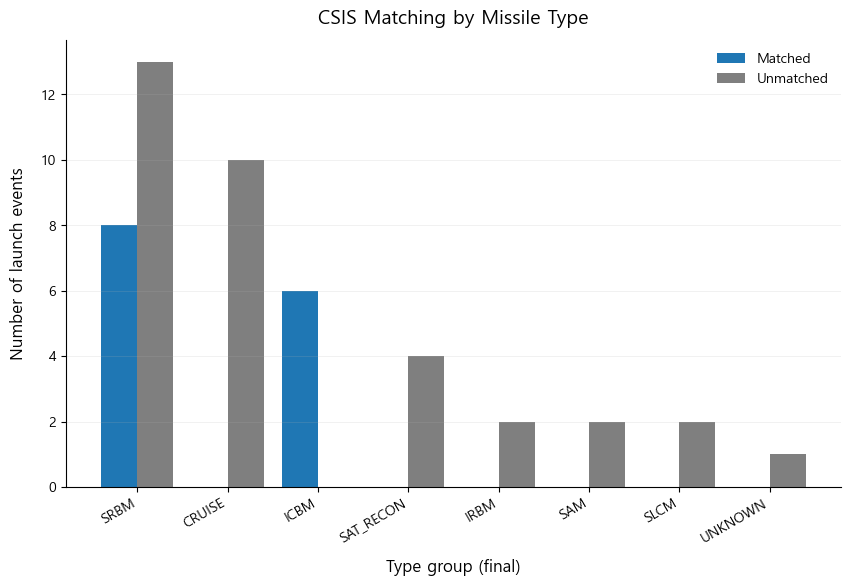

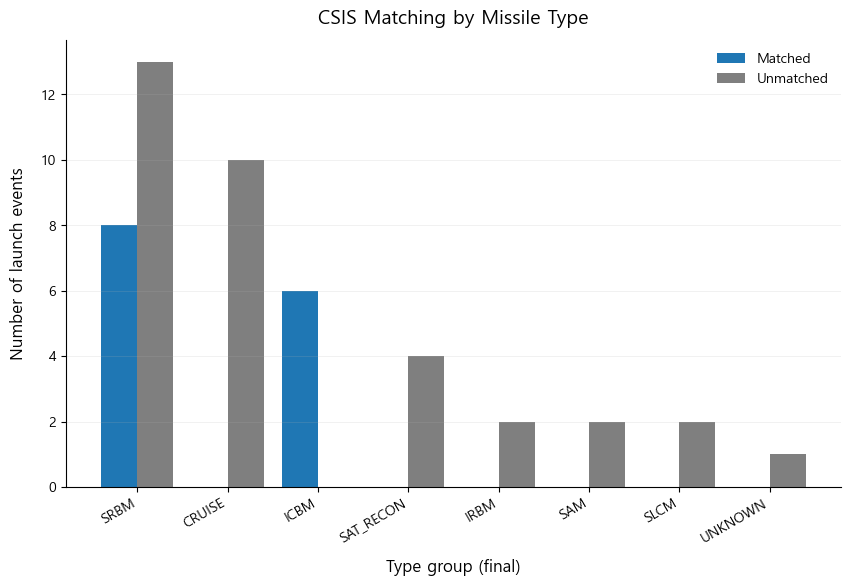

Unmatched missile systems (unique):
Unmatched missile systems (unique):


,missile_name,missile_name_rom,type_group_base_final
33,바다수리-6,BadaSuri-6,CRUISE
28,불화살-3-31,Bulhwasal-3-31,CRUISE
9,화살-1,Hwasal-1,CRUISE
21,"화살-1, 화살-2","Hwasal-1, Hwasal-2",CRUISE
31,화살-1라-3,Hwasal-1-D-3,CRUISE
3,화살-2,Hwasal-2,CRUISE
17,UNKNOWN,UNKNOWN,CRUISE
35,화성-16나,Hwasong-16-B,IRBM
27,UNKNOWN,UNKNOWN,IRBM
37,별찌-1-2,Byeoljji-1-2,SAM


,missile_name,missile_name_rom,type_group_base_final
33,바다수리-6,BadaSuri-6,CRUISE
28,불화살-3-31,Bulhwasal-3-31,CRUISE
9,화살-1,Hwasal-1,CRUISE
21,"화살-1, 화살-2","Hwasal-1, Hwasal-2",CRUISE
31,화살-1라-3,Hwasal-1-D-3,CRUISE
3,화살-2,Hwasal-2,CRUISE
17,UNKNOWN,UNKNOWN,CRUISE
35,화성-16나,Hwasong-16-B,IRBM
27,UNKNOWN,UNKNOWN,IRBM
37,별찌-1-2,Byeoljji-1-2,SAM


In [5]:
# Step 3. CSIS matching & classification reliability

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Output directory
FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Defensive checks
required_cols = ["matched_csis", "type_group_base_final", "year"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for Step 3: {missing}")

df3 = df.copy()

# Color scheme (neutral, methodological tone)
COLORS = {
    "Matched": "#1f77b4",
    "Unmatched": "#7f7f7f",
}

def style_axes(ax, title=None, xlabel=None, ylabel=None):
    ax.grid(True, axis="y", linestyle="-", linewidth=0.5, alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if title: ax.set_title(title, pad=12)
    if xlabel: ax.set_xlabel(xlabel, labelpad=10)
    if ylabel: ax.set_ylabel(ylabel, labelpad=10)

def save_fig(fig, filename):
    out = FIG_DIR / filename
    fig.savefig(out, dpi=200, bbox_inches="tight")
    print("Saved:", out)

# ======================================================
# Figure 7. Overall CSIS matching rate
# ======================================================
match_counts = (
    df3["matched_csis"]
    .value_counts()
    .rename(index={True: "Matched", False: "Unmatched"})
)

fig, ax = plt.subplots(figsize=(7.8, 4.8))

bars = ax.bar(
    match_counts.index,
    match_counts.values,
    color=[COLORS[i] for i in match_counts.index]
)

total = match_counts.sum()

for b in bars:
    pct = b.get_height() / total * 100
    ax.text(
        b.get_x() + b.get_width() / 2,
        b.get_height(),
        f"{int(b.get_height())}\n({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11
    )

style_axes(
    ax,
    title="CSIS Matching Rate (Overall)",
    ylabel="Number of launch events"
)

save_fig(fig, "fig7_csis_matching_overall.png")
plt.show()

# ======================================================
# Figure 8. CSIS matching by missile type
# ======================================================
type_match = (
    df3.groupby(["type_group_base_final", "matched_csis"])
       .size()
       .unstack(fill_value=0)
       .rename(columns={True: "Matched", False: "Unmatched"})
)

# Ensure both columns exist
for col in ["Matched", "Unmatched"]:
    if col not in type_match.columns:
        type_match[col] = 0

# Sort by total events
type_match["Total"] = type_match["Matched"] + type_match["Unmatched"]
type_match = type_match.sort_values("Total", ascending=False)

fig, ax = plt.subplots(figsize=(10, 5.8))

x = np.arange(len(type_match.index))
width = 0.4

ax.bar(
    x - width / 2,
    type_match["Matched"],
    width,
    label="Matched",
    color=COLORS["Matched"]
)

ax.bar(
    x + width / 2,
    type_match["Unmatched"],
    width,
    label="Unmatched",
    color=COLORS["Unmatched"]
)

ax.set_xticks(x)
ax.set_xticklabels(type_match.index, rotation=30, ha="right")

style_axes(
    ax,
    title="CSIS Matching by Missile Type",
    xlabel="Type group (final)",
    ylabel="Number of launch events"
)

ax.legend(frameon=False)

save_fig(fig, "fig8_csis_matching_by_type.png")
plt.show()

# ======================================================
# Table. Unmatched event breakdown (for interpretation)
# ======================================================
unmatched_summary = (
    df3.loc[df3["matched_csis"] == False,
            ["missile_name", "missile_name_rom", "type_group_base_final"]]
    .drop_duplicates()
    .sort_values(["type_group_base_final", "missile_name_rom"])
)

print("Unmatched missile systems (unique):")
display(unmatched_summary)


### Step 3A. Type Reconciliation for Analysis (Rule-based)

We create an additional analysis-only type label that prioritizes CSIS classification
*only when* the missile name is unambiguously matched to CSIS and the system falls
within CSIS scope (SRBM/MRBM/IRBM/ICBM/CRUISE/SLBM).

Key principles:
- Do not overwrite original labels (transparency)
- Apply conservative overrides with explicit flags
- Avoid forcing CSIS types onto out-of-scope categories (SAT_RECON, SAM, etc.)


In [6]:
# Step 3A. Create analysis-only type label with conservative CSIS-based reconciliation

import numpy as np
import pandas as pd

# Allowed CSIS scope for "type correction"
CSIS_SCOPE_TYPES = {"SRBM", "MRBM", "IRBM", "ICBM", "CRUISE", "SLBM"}

# Ensure required columns exist
needed = ["type_group_base_final", "type_group_base_ref", "matched_csis", "type_group"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns needed for Step 3A: {missing}")

df3a = df.copy()

# 1) Detect uncertainty cues (e.g., "추정", "가능성", "?") from the original type_group string
#    This does NOT block correction by itself; it only informs flags.
uncertainty_pattern = r"(추정|가능|가능성|\?|미확인|불명|tentative|suspected|likely)"
df3a["type_uncertainty_flag"] = (
    df3a["type_group"].astype(str).str.contains(uncertainty_pattern, case=False, regex=True, na=False)
)

# 2) Build analysis type column (do not overwrite originals)
df3a["type_group_analysis"] = df3a["type_group_base_final"].astype("string")
df3a["type_group_change_flag"] = pd.Series([pd.NA] * len(df3a), dtype="string")

# 3) Conservative override rule:
#    Override only if:
#    - matched_csis == True (name matched)
#    - csis type is in CSIS_SCOPE_TYPES
#    - and either:
#      (a) author type is missing/blank/UNKNOWN, or
#      (b) author type is also within CSIS_SCOPE_TYPES but differs from CSIS (classification mismatch)
author_missing = df3a["type_group_analysis"].isna() | (df3a["type_group_analysis"].str.strip() == "") | (df3a["type_group_analysis"] == "UNKNOWN")

author_in_scope = df3a["type_group_analysis"].isin(list(CSIS_SCOPE_TYPES))
csis_in_scope = df3a["type_group_base_ref"].isin(list(CSIS_SCOPE_TYPES))

mask_fill_missing = (
    (df3a["matched_csis"] == True) &
    csis_in_scope &
    author_missing
)

mask_override_mismatch = (
    (df3a["matched_csis"] == True) &
    csis_in_scope &
    author_in_scope &
    (df3a["type_group_analysis"] != df3a["type_group_base_ref"])
)

# Apply (a) fill missing
df3a.loc[mask_fill_missing, "type_group_analysis"] = df3a.loc[mask_fill_missing, "type_group_base_ref"]
df3a.loc[mask_fill_missing, "type_group_change_flag"] = "filled_missing_from_csis"

# Apply (b) override mismatch
df3a.loc[mask_override_mismatch, "type_group_analysis"] = df3a.loc[mask_override_mismatch, "type_group_base_ref"]
df3a.loc[mask_override_mismatch, "type_group_change_flag"] = "override_to_csis_due_to_name_match"

# 4) Preserve out-of-scope categories regardless of CSIS
#    (e.g., SAT_RECON, SAM): they should not be forced into ballistic/cruise groups.
#    We keep them as-is in type_group_analysis.
# (Already preserved by logic; this comment is here for documentation.)

# 5) Summary outputs for transparency
print("Type reconciliation summary (counts):")
print(df3a["type_group_change_flag"].value_counts(dropna=False))

print("\nExamples of overrides (first 10):")
display(
    df3a.loc[df3a["type_group_change_flag"].notna(),
             ["launch_date", "missile_name", "missile_name_rom", "missile_name_csis",
              "type_group_base_final", "type_group_base_ref", "type_group_analysis",
              "type_uncertainty_flag", "type_group_change_flag"]]
    .head(10)
)

# 6) Replace df with reconciled df for downstream visualization steps (B)
df = df3a.copy()


Type reconciliation summary (counts):
type_group_change_flag
<NA>    48
Name: count, dtype: Int64

Examples of overrides (first 10):
Type reconciliation summary (counts):
type_group_change_flag
<NA>    48
Name: count, dtype: Int64

Examples of overrides (first 10):


C:\Users\82102\AppData\Local\Temp\ipykernel_26696\2983285158.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3a["type_group"].astype(str).str.contains(uncertainty_pattern, case=False, regex=True, na=False)
C:\Users\82102\AppData\Local\Temp\ipykernel_26696\2983285158.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3a["type_group"].astype(str).str.contains(uncertainty_pattern, case=False, regex=True, na=False)


,launch_date,missile_name,missile_name_rom,missile_name_csis,type_group_base_final,type_group_base_ref,type_group_analysis,type_uncertainty_flag,type_group_change_flag


,launch_date,missile_name,missile_name_rom,missile_name_csis,type_group_base_final,type_group_base_ref,type_group_analysis,type_uncertainty_flag,type_group_change_flag


## Step 4. Launch Site & Regional Distribution (Text-based Geography)

This step visualizes geographical patterns using the `launch_site` text field.

Because `launch_site` is a textual location label (not coordinates), we:
- Extract high-level administrative regions from Korean strings (e.g., 평양시, 평안남도)
- Visualize the distribution of launch events by region
- Highlight top launch sites (most frequent)

Figures are saved to `outputs/figures/`.


In [7]:
# (One-time) Korean font setup for matplotlib

import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams["font.family"] = font_prop.get_name()
else:
    print("WARNING: Korean font not found (malgun.ttf). Hangul may not render correctly.")

plt.rcParams["axes.unicode_minus"] = False


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig9_top_launch_sites.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig9_top_launch_sites.png


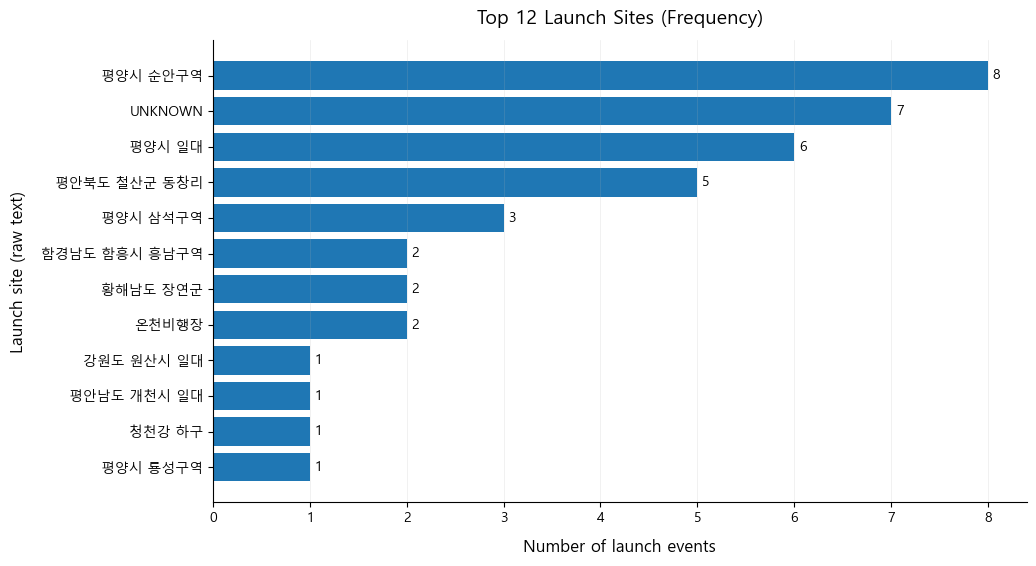

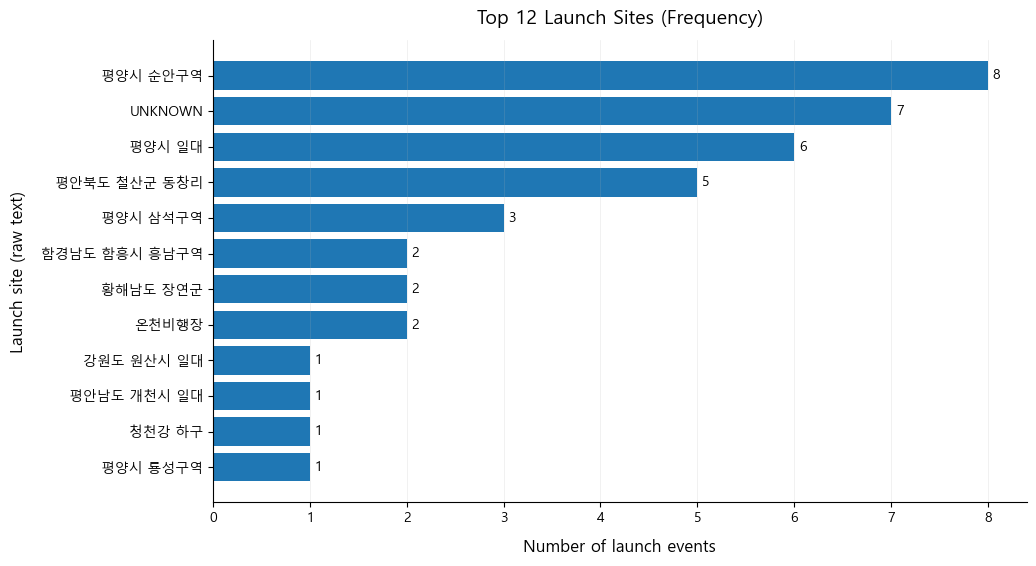

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig10_launch_events_by_region.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig10_launch_events_by_region.png


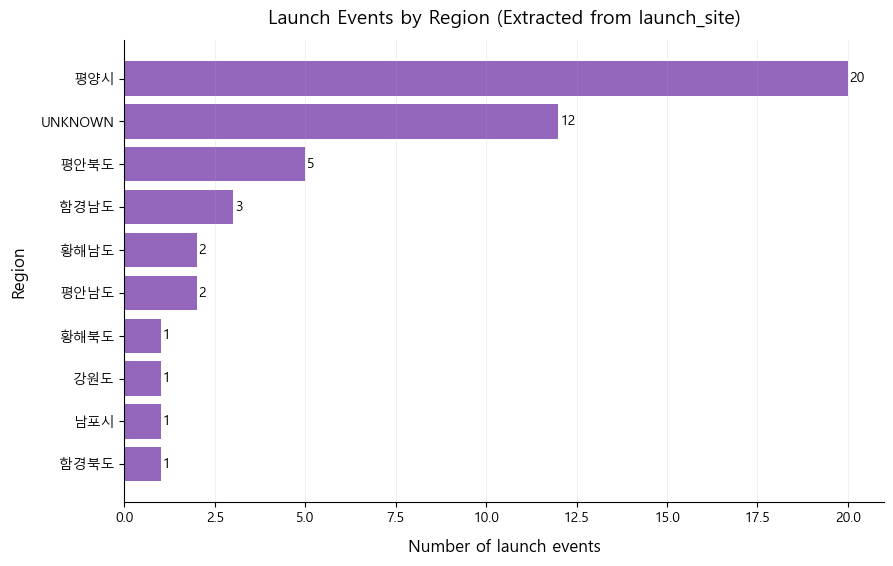

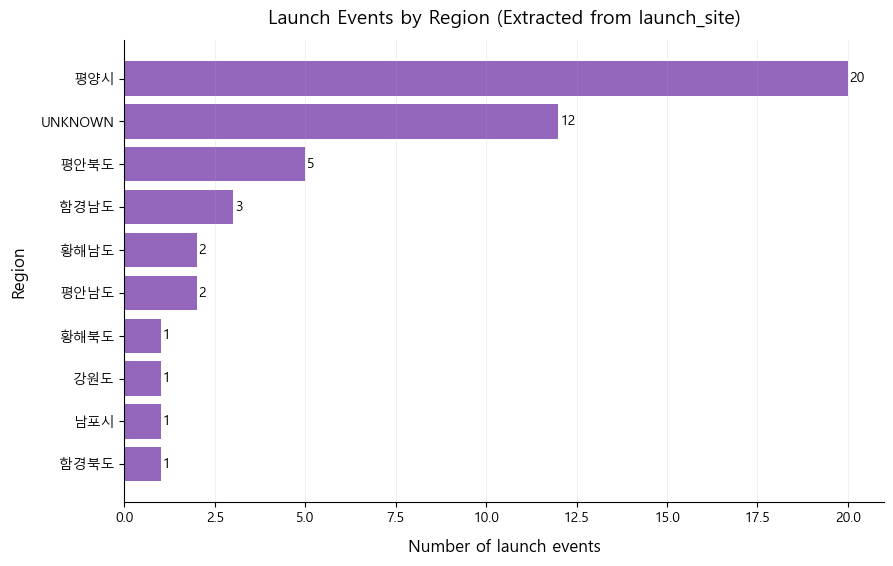

Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig11_region_by_type_heatmap.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig11_region_by_type_heatmap.png


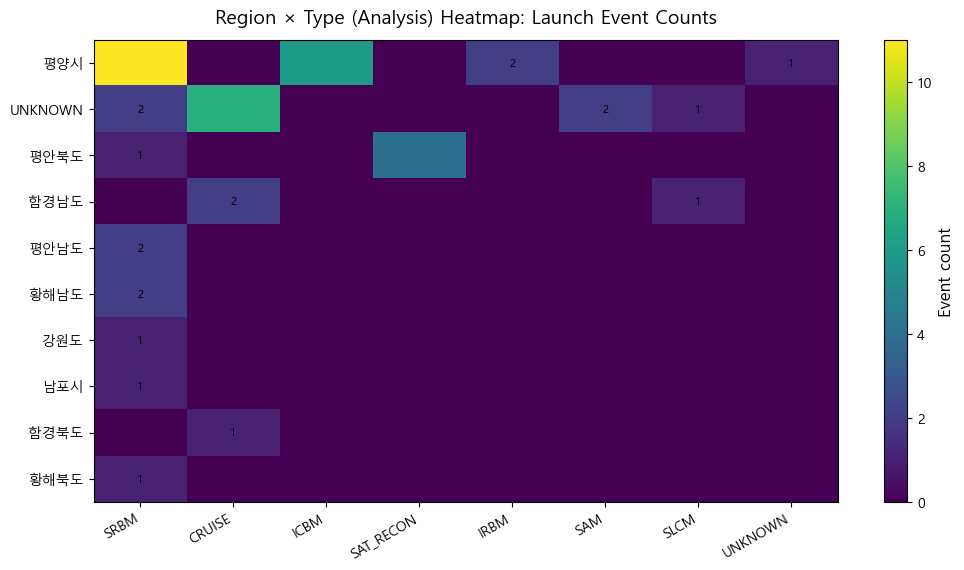

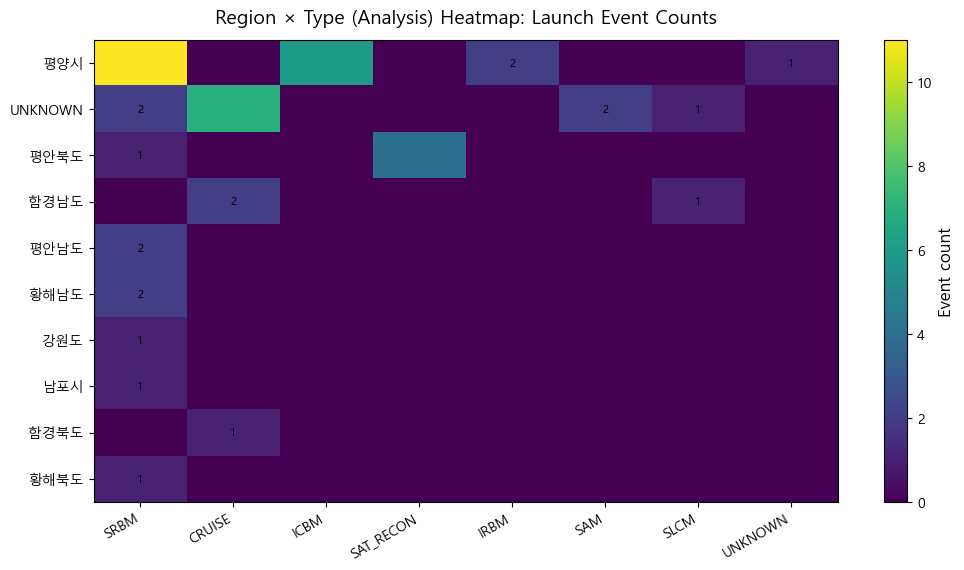

Region extraction sample:
Region extraction sample:


,launch_site,region
0,평양시 룡성구역,평양시
1,평양시 순안구역,평양시
2,평안남도 숙천군,평안남도
3,함경북도 김책시,함경북도
4,남포시 강서구역,남포시
5,합경남도 홍원군,UNKNOWN
6,황해남도 장연군,황해남도
8,평안북도 철산군 동창리,평안북도
9,함경남도 함흥시 흥남구역,함경남도
11,평양시 력폭구역,평양시


,launch_site,region
0,평양시 룡성구역,평양시
1,평양시 순안구역,평양시
2,평안남도 숙천군,평안남도
3,함경북도 김책시,함경북도
4,남포시 강서구역,남포시
5,합경남도 홍원군,UNKNOWN
6,황해남도 장연군,황해남도
8,평안북도 철산군 동창리,평안북도
9,함경남도 함흥시 흥남구역,함경남도
11,평양시 력폭구역,평양시


In [8]:
# Step 4. Launch site & region distribution (text-based)

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Defensive checks
if "launch_site" not in df.columns:
    raise ValueError("Missing 'launch_site' column. Check processed dataset export.")
if "type_group_analysis" not in df.columns:
    # fallback if user skips Step 3A
    df["type_group_analysis"] = df.get("type_group_base_final")

# Styling helpers
def style_axes(ax, title=None, xlabel=None, ylabel=None):
    ax.grid(True, axis="x", linestyle="-", linewidth=0.5, alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if title: ax.set_title(title, pad=12)
    if xlabel: ax.set_xlabel(xlabel, labelpad=10)
    if ylabel: ax.set_ylabel(ylabel, labelpad=10)

def save_fig(fig, filename):
    out = FIG_DIR / filename
    fig.savefig(out, dpi=200, bbox_inches="tight")
    print("Saved:", out)

# 4-1) Region extraction from Korean location strings
# We extract the first matching high-level admin token.
REGION_PATTERNS = [
    r"(평양시)",
    r"(남포시)",
    r"(개성시)",
    r"(라선시)",
    r"(평안남도)",
    r"(평안북도)",
    r"(황해남도)",
    r"(황해북도)",
    r"(함경남도)",
    r"(함경북도)",
    r"(강원도)",
    r"(자강도)",
    r"(량강도|양강도)",  # handle variant spelling
]

def extract_region(s: str):
    if pd.isna(s):
        return "UNKNOWN"
    t = str(s).strip()
    for pat in REGION_PATTERNS:
        m = re.search(pat, t)
        if m:
            # normalize variant
            reg = m.group(1)
            reg = reg.replace("양강도", "량강도")
            return reg
    return "UNKNOWN"

df_geo = df.copy()
df_geo["region"] = df_geo["launch_site"].apply(extract_region)

# 4-2) Figure 9. Top launch sites (most frequent)
top_n = 12
site_counts = (
    df_geo["launch_site"]
    .fillna("UNKNOWN")
    .value_counts()
    .head(top_n)
    .sort_values(ascending=True)  # for horizontal bars
)

fig, ax = plt.subplots(figsize=(10.5, 6))
ax.barh(site_counts.index, site_counts.values, color="#1f77b4")

# annotate values
for i, v in enumerate(site_counts.values):
    ax.text(v + 0.05, i, str(int(v)), va="center", fontsize=10)

style_axes(
    ax,
    title=f"Top {top_n} Launch Sites (Frequency)",
    xlabel="Number of launch events",
    ylabel="Launch site (raw text)"
)

save_fig(fig, "fig9_top_launch_sites.png")
plt.show()

# 4-3) Figure 10. Regional distribution (high-level admin)
region_counts = (
    df_geo["region"]
    .value_counts()
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(figsize=(9.8, 6))
ax.barh(region_counts.index, region_counts.values, color="#9467bd")

for i, v in enumerate(region_counts.values):
    ax.text(v + 0.05, i, str(int(v)), va="center", fontsize=10)

style_axes(
    ax,
    title="Launch Events by Region (Extracted from launch_site)",
    xlabel="Number of launch events",
    ylabel="Region"
)

save_fig(fig, "fig10_launch_events_by_region.png")
plt.show()

# 4-4) Figure 11. Region x Type heatmap (count matrix)
# (No seaborn; pure matplotlib)
pivot = (
    df_geo.pivot_table(
        index="region",
        columns="type_group_analysis",
        values="event_id" if "event_id" in df_geo.columns else "launch_date",
        aggfunc="count",
        fill_value=0
    )
)

# Sort regions by total activity
pivot["__total__"] = pivot.sum(axis=1)
pivot = pivot.sort_values("__total__", ascending=False).drop(columns="__total__")

# Sort types by total activity
type_order = pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
pivot = pivot[type_order]

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(pivot.values, aspect="auto")

ax.set_yticks(np.arange(len(pivot.index)))
ax.set_yticklabels(pivot.index)

ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=30, ha="right")

ax.set_title("Region × Type (Analysis) Heatmap: Launch Event Counts", pad=12)

# add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Event count")

# annotate small counts for readability (optional threshold)
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.iat[i, j]
        if val > 0 and val <= 3:
            ax.text(j, i, str(int(val)), ha="center", va="center", fontsize=8)

save_fig(fig, "fig11_region_by_type_heatmap.png")
plt.show()

print("Region extraction sample:")
display(df_geo[["launch_site", "region"]].drop_duplicates().head(15))


## Step 4A–4B. Map Visualization (Choropleth + Point Map)

This project is conducted for **educational / self-study purposes**.

Important notes:
- North Korea missile launch activities are a sensitive domain and open-source reporting may contain uncertainty.
- Therefore:
  - **Step 4A** uses **administrative-level aggregation** (province/city) to avoid over-precision.
  - **Step 4B** (point map) uses a **manual geocoding template** (user-provided coordinates) and should be treated as **approximate / illustrative**, not as verified ground truth.

All map figures are intended for visualization practice and reproducible data-science workflow (GitHub + PDF).


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig12_map_region_bubble_overview.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig12_map_region_bubble_overview.png


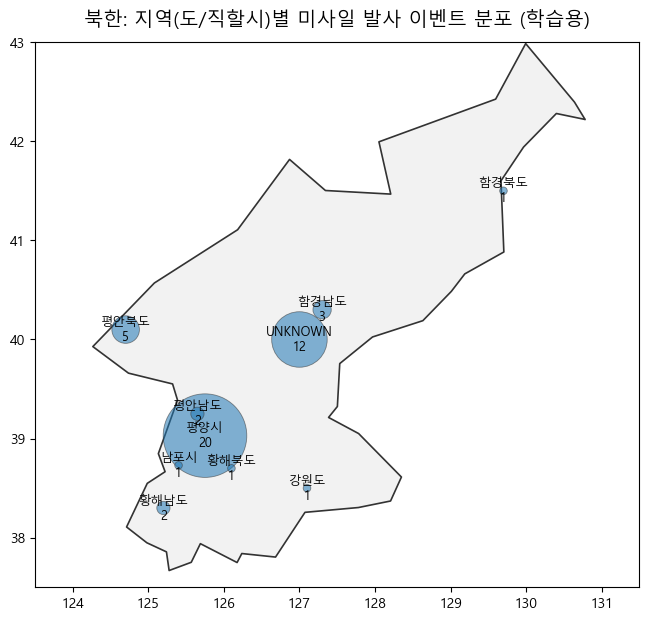

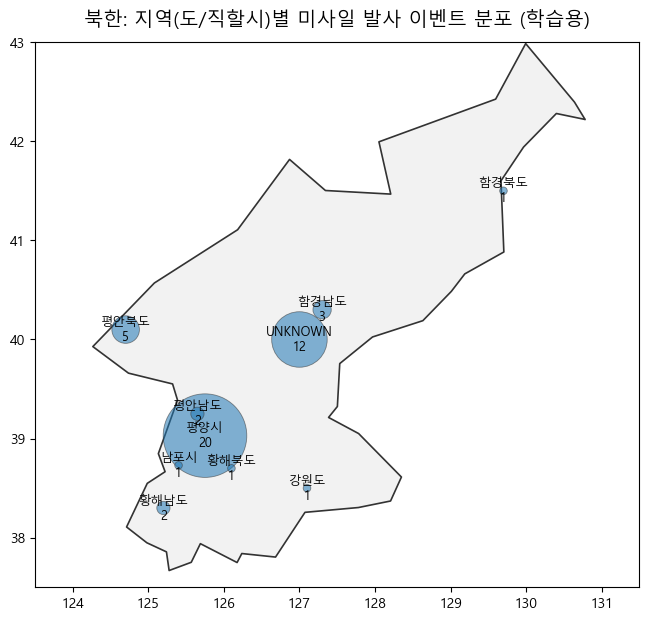

In [13]:
# Step 4A. Region bubble map (using Natural Earth Shapefile)

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(fig, filename):
    out = FIG_DIR / filename
    fig.savefig(out, dpi=200, bbox_inches="tight")
    print("Saved:", out)

# --- Load Natural Earth shapefile ---
shp_path = PROJECT_ROOT / "data" / "aux" / "ne_110m_admin_0_countries.shp"
if not shp_path.exists():
    raise FileNotFoundError(f"Missing shapefile: {shp_path}")

world0 = gpd.read_file(shp_path)

nk0 = world0[world0["ISO_A3"] == "PRK"].copy()
if nk0.empty:
    nk0 = world0[world0["ADMIN"].str.contains("Korea", case=False, na=False)].copy()
if nk0.empty:
    raise ValueError("North Korea polygon not found in shapefile.")

# --- Aggregate by region ---
region_counts = (
    df_geo["region"]
    .fillna("UNKNOWN")
    .value_counts()
    .rename_axis("region_kr")
    .reset_index(name="event_count")
)

region_label_points = {
    "평양시": (125.75, 39.03),
    "남포시": (125.40, 38.73),
    "개성시": (126.55, 37.97),
    "라선시": (130.70, 42.25),
    "평안남도": (125.65, 39.25),
    "평안북도": (124.70, 40.10),
    "황해남도": (125.20, 38.30),
    "황해북도": (126.10, 38.70),
    "함경남도": (127.30, 40.30),
    "함경북도": (129.70, 41.50),
    "강원도": (127.10, 38.50),
    "자강도": (126.60, 40.80),
    "량강도": (128.20, 41.90),
    "UNKNOWN": (127.0, 40.0),
}

region_counts["lon"] = region_counts["region_kr"].map(lambda x: region_label_points.get(x, region_label_points["UNKNOWN"])[0])
region_counts["lat"] = region_counts["region_kr"].map(lambda x: region_label_points.get(x, region_label_points["UNKNOWN"])[1])

# --- Plot ---
fig, ax = plt.subplots(figsize=(7.8, 7.8))
nk0.to_crs(epsg=4326).plot(ax=ax, color="#f2f2f2", edgecolor="#333333", linewidth=1.2)

sizes = (region_counts["event_count"].clip(lower=1) ** 1.6) * 30
ax.scatter(
    region_counts["lon"], region_counts["lat"],
    s=sizes, alpha=0.55,
    edgecolors="#333333", linewidths=0.6
)

for _, r in region_counts.iterrows():
    ax.text(
        r["lon"], r["lat"],
        f"{r['region_kr']}\n{int(r['event_count'])}",
        ha="center", va="center", fontsize=9
    )

ax.set_title("북한: 지역(도/직할시)별 미사일 발사 이벤트 분포 (학습용)", pad=12)
ax.set_xlim(123.5, 131.5)
ax.set_ylim(37.5, 43.0)

save_fig(fig, "fig12_map_region_bubble_overview.png")
plt.show()


### Step 4B. Point-level Map Visualization (Deferred)

A point-based map visualization of individual launch sites was considered as a
potential extension of this analysis.

However, this step is **intentionally deferred** due to the following reasons:

- The `launch_site` field is provided as **textual descriptions only**.
- There is no publicly available, verified latitude/longitude dataset for
  North Korean missile launch locations.
- Any coordinate assignment would rely on **manual approximation or inference**,
  which may introduce misleading spatial precision.

For this reason:
- No point-level map is included in the current analysis.
- The spatial analysis is limited to **region-level aggregation (Step 4A)**,
  which is sufficient for identifying macroscopic geographic patterns.

This step may be revisited in future work if:
- A reliable geocoded dataset becomes available, or
- A clearly defined and documented geocoding methodology is established.


In [10]:
# # Step 4B-1. Create manual geocoding template (unique launch sites)

# import pandas as pd
# import numpy as np

# AUX_DIR = PROJECT_ROOT / "data" / "aux"
# AUX_DIR.mkdir(parents=True, exist_ok=True)

# template_path = AUX_DIR / "site_geocode_template.csv"

# # df_geo is created in your Step 4 text-based cell
# # Ensure it exists
# if "df_geo" not in globals():
#     raise ValueError("df_geo not found. Run Step 4 text-based region extraction cell first.")

# unique_sites = (
#     df_geo[["launch_site", "region"]]
#     .dropna(subset=["launch_site"])
#     .drop_duplicates()
#     .sort_values(["region", "launch_site"])
#     .reset_index(drop=True)
# )

# template = unique_sites.copy()
# template["lat"] = np.nan
# template["lon"] = np.nan
# template["confidence"] = ""   # e.g., high/medium/low
# template["source_note"] = ""  # e.g., "approx anchor", "OSINT map", etc.

# template.to_csv(template_path, index=False, encoding="utf-8-sig")
# print("Saved template:", template_path)
# display(template.head(15))
# print(f"Total unique launch_site rows: {len(template)}")


Saved template: C:\Users\82102\Desktop\nk-missile-launches\data\aux\site_geocode_template.csv


,launch_site,region,lat,lon,confidence,source_note
0,UNKNOWN,UNKNOWN,NaN,NaN,,
1,온천비행장,UNKNOWN,NaN,NaN,,
2,청천강 하구,UNKNOWN,NaN,NaN,,
3,평양국제비행장,UNKNOWN,NaN,NaN,,
4,합경남도 홍원군,UNKNOWN,NaN,NaN,,
5,강원도 원산시 일대,강원도,NaN,NaN,,
6,남포시 강서구역,남포시,NaN,NaN,,
7,평안남도 개천시 일대,평안남도,NaN,NaN,,
8,평안남도 숙천군,평안남도,NaN,NaN,,
9,평안북도 철산군 동창리,평안북도,NaN,NaN,,


Total unique launch_site rows: 21
Saved template: C:\Users\82102\Desktop\nk-missile-launches\data\aux\site_geocode_template.csv


,launch_site,region,lat,lon,confidence,source_note
0,UNKNOWN,UNKNOWN,NaN,NaN,,
1,온천비행장,UNKNOWN,NaN,NaN,,
2,청천강 하구,UNKNOWN,NaN,NaN,,
3,평양국제비행장,UNKNOWN,NaN,NaN,,
4,합경남도 홍원군,UNKNOWN,NaN,NaN,,
5,강원도 원산시 일대,강원도,NaN,NaN,,
6,남포시 강서구역,남포시,NaN,NaN,,
7,평안남도 개천시 일대,평안남도,NaN,NaN,,
8,평안남도 숙천군,평안남도,NaN,NaN,,
9,평안북도 철산군 동창리,평안북도,NaN,NaN,,


Total unique launch_site rows: 21


Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig13_map_launch_sites_points_manual.png
Saved: C:\Users\82102\Desktop\nk-missile-launches\outputs\figures\fig13_map_launch_sites_points_manual.png


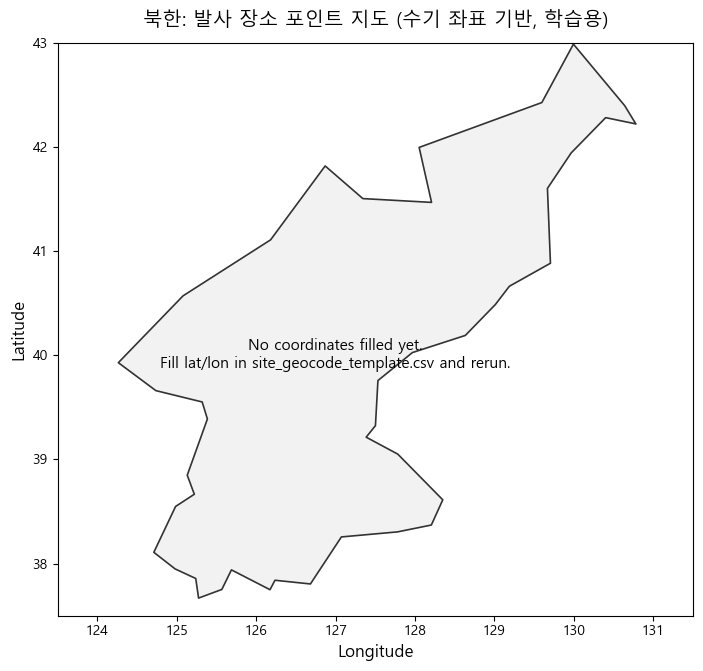

Points plotted (rows with coordinates): 0


,launch_site,region,lat,lon,confidence,source_note,event_count


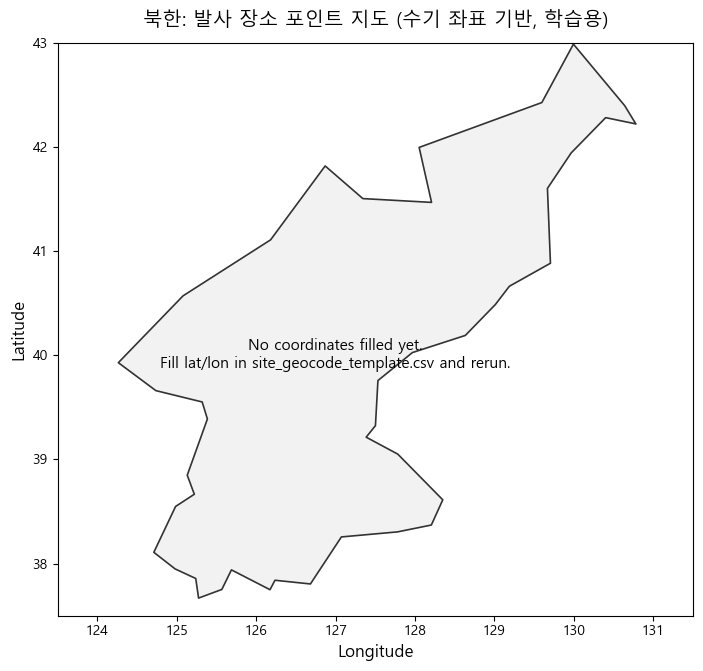

Points plotted (rows with coordinates): 0


,launch_site,region,lat,lon,confidence,source_note,event_count


In [11]:
# # Step 4B-2. Plot launch site points on NK base map (Shapefile-based)

# import geopandas as gpd
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
# FIG_DIR.mkdir(parents=True, exist_ok=True)

# def save_fig(fig, filename):
#     out = FIG_DIR / filename
#     fig.savefig(out, dpi=200, bbox_inches="tight")
#     print("Saved:", out)

# # --- Load base map (Natural Earth shapefile) ---
# shp_path = PROJECT_ROOT / "data" / "aux" / "ne_110m_admin_0_countries.shp"
# if not shp_path.exists():
#     raise FileNotFoundError(f"Missing shapefile: {shp_path}")

# world0 = gpd.read_file(shp_path)

# nk0 = world0[world0["ISO_A3"] == "PRK"].copy()
# if nk0.empty:
#     nk0 = world0[world0["ADMIN"].str.contains("Korea", case=False, na=False)].copy()
# if nk0.empty:
#     raise ValueError("North Korea polygon not found in Natural Earth shapefile.")

# # --- Read user-filled template ---
# template_path = PROJECT_ROOT / "data" / "aux" / "site_geocode_template.csv"
# if not template_path.exists():
#     raise FileNotFoundError(f"Missing template file: {template_path}. Run Step 4B-1 first.")

# site_geo = pd.read_csv(template_path, encoding="utf-8-sig")

# # Keep rows with coordinates only
# site_geo = site_geo.dropna(subset=["lat", "lon"]).copy()

# # Compute event counts per site for marker size
# site_counts = (
#     df_geo["launch_site"]
#     .value_counts()
#     .rename_axis("launch_site")
#     .reset_index(name="event_count")
# )
# site_geo = site_geo.merge(site_counts, on="launch_site", how="left")
# site_geo["event_count"] = site_geo["event_count"].fillna(1)

# # --- Plot ---
# fig, ax = plt.subplots(figsize=(8.2, 8.2))
# nk0.to_crs(epsg=4326).plot(ax=ax, color="#f2f2f2", edgecolor="#333333", linewidth=1.2)

# if len(site_geo) == 0:
#     ax.text(
#         127.0, 40.0,
#         "No coordinates filled yet.\nFill lat/lon in site_geocode_template.csv and rerun.",
#         ha="center", va="center", fontsize=11
#     )
# else:
#     # Marker size scaling
#     sizes = (site_geo["event_count"].clip(lower=1) ** 1.5) * 40

#     ax.scatter(
#         site_geo["lon"], site_geo["lat"],
#         s=sizes,
#         alpha=0.70,
#         color="#1f77b4",
#         edgecolors="#111111",
#         linewidths=0.6
#     )

#     # Label top-K sites to avoid clutter
#     TOPK_LABEL = 10
#     topk = site_geo.sort_values("event_count", ascending=False).head(TOPK_LABEL)

#     for _, r in topk.iterrows():
#         ax.text(
#             r["lon"], r["lat"],
#             r["launch_site"],
#             fontsize=8,
#             ha="left",
#             va="bottom"
#         )

# ax.set_title("북한: 발사 장소 포인트 지도 (수기 좌표 기반, 학습용)", pad=12)
# ax.set_xlim(123.5, 131.5)
# ax.set_ylim(37.5, 43.0)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

# save_fig(fig, "fig13_map_launch_sites_points_manual.png")
# plt.show()

# print("Points plotted (rows with coordinates):", len(site_geo))
# display(site_geo.sort_values("event_count", ascending=False).head(15))
